In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

In [1]:
from torchvision.io import read_image

In [ ]:
# https://www.kaggle.com/datasets/playlist/mnistzip/
!unzip archive.zip

In [ ]:
!rm -r mnist_png/mnist_png/

In [ ]:
im = read_image("mnist_png/train/0/1.png")

In [ ]:
import matplotlib.pyplot as plt

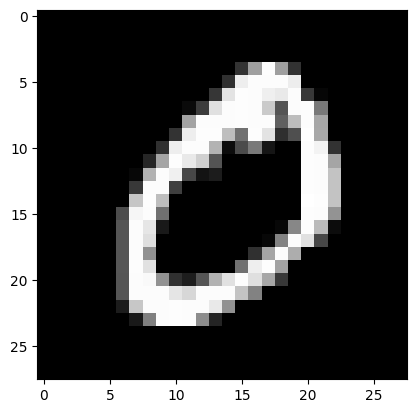

In [ ]:
plt.imshow(im.squeeze(dim=0)/255, cmap='gray')

In [ ]:
root_dir = 'mnist_png'

In [ ]:
import pathlib

In [ ]:
class MNIST_dataset(Dataset):
  def __init__(self, path_to_data):
    super().__init__()
    self.path_to_data = pathlib.Path(path_to_data)
    self.paths = list(self.path_to_data.rglob('*.png'))

  def __len__(self):
    return len(self.paths)

  def __getitem__(self, index):
     return read_image(self.paths[index].as_posix()).squeeze(dim=0)/255, torch.tensor(int(self.paths[index].as_posix().split('/')[-2]))

In [ ]:
train_data = MNIST_dataset(root_dir+'/train')

In [ ]:
train_data[0][0].shape, train_data[0][1]

(torch.Size([28, 28]), tensor(3))

In [ ]:
train_data_loader = DataLoader(train_data, batch_size=64, shuffle=True)

In [ ]:
import torch.nn as nn
from torch.optim import Adam

In [ ]:
class MyModel(nn.Module):
  def __init__(self, h_d):
    super().__init__()
    self.flat = nn.Flatten(1,-1)
  def forward(self, x):
      x= self.flat(x)
    return x

In [ ]:
model = MyModel(10)

In [ ]:
model.flat(torch.zeros(2,28,28)).shape

torch.Size([2, 784])

https://albumentations.ai/docs/examples/pytorch_classification/

In [ ]:
import albumentations as A

In [5]:
!wget https://www.cs.rit.edu/~ams/Pine.png

--2024-04-11 16:00:02--  https://www.cs.rit.edu/~ams/Pine.png
Resolving www.cs.rit.edu (www.cs.rit.edu)... 129.21.34.17
Connecting to www.cs.rit.edu (www.cs.rit.edu)|129.21.34.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1599631 (1.5M) [image/png]
Saving to: ‘Pine.png’

Pine.png            100%[===================>]   1.53M  3.61MB/s    in 0.4s    

2024-04-11 16:00:02 (3.61 MB/s) - ‘Pine.png’ saved [1599631/1599631]



In [6]:
im = read_image('Pine.png')

In [ ]:
im.shape

torch.Size([4, 1024, 768])

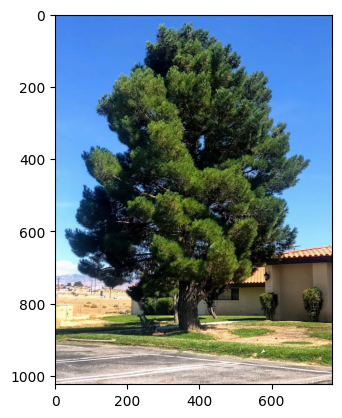

In [ ]:
plt.imshow(im.permute(1, 2, 0))

In [ ]:
MyTransform = A.Compose([
    A.RandomResizedCrop(height=128, width=128),
    A.Rotate(limit=30),
    A.HorizontalFlip(p=0.3),
    A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.5)
])

In [ ]:
im1 = MyTransform(image=im.numpy().transpose(1,2,0))['image']
im1.shape

(128, 128, 4)

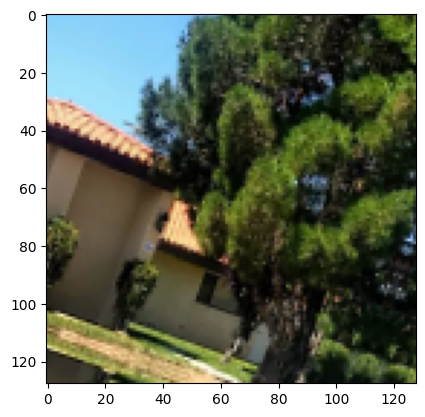

In [ ]:
plt.imshow(im1)